In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a la carpeta principal
# carpeta_principal = r"C:\Users\Adrian\Desktop\deepgaze_pytorch\deepgaze_pytorch\checkpoints"
carpeta_principal = r"c:\Users\Adrian\Desktop\backups\gauss clasi"

# Lista de categorías en el mismo orden que en la imagen proporcionada
categorias = [
    "Action", "Affective", "Art", "BlackWhite", "Cartoon", "Fractal", "Indoor", "Inverted",
    "Jumbled", "LineDrawing", "LowResolution", "Noisy", "Object", "OutdoorManMade",
    "OutdoorNatural", "Pattern", "Random", "Satellite", "Sketch", "Social"
]

# Ordenar los archivos .npy en la carpeta principal
archivos = sorted([f for f in os.listdir(carpeta_principal) if f.endswith(".npy")])

# Inicializar una lista para almacenar los DataFrames de cada archivo
dataframes = []

# Máximo valor de epoch inicializado en -1
max_epoch = -1

# Recorrer cada archivo y asignar categorías manualmente
for archivo in archivos:
    ruta_archivo = os.path.join(carpeta_principal, archivo)
    
    # Cargar el archivo .npy
    try:
        data = np.load(ruta_archivo)
        
        # Convertir a DataFrame, cada fila es una categoría y cada columna un encoder
        df = pd.DataFrame(data)
        
        # Asignar nombres de categorías en el orden indicado
        df['Category'] = categorias
        
        # Asignar la época
        if archivo == "final_category_weights.npy":
            df['Epoch'] = max_epoch + 1  # Asignar un valor de época mayor que el último
        else:
            epoch = archivo.split('_')[-1].replace(".npy", "")
            epoch_num = int(epoch) if epoch.isdigit() else 0
            df['Epoch'] = epoch_num
            max_epoch = max(max_epoch, epoch_num)  # Actualizar el máximo valor de epoch
        
        # Agregar al DataFrame principal
        dataframes.append(df)
        
        print(f"Archivo {archivo} cargado con éxito.")
    except Exception as e:
        print(f"Error al cargar {ruta_archivo}: {e}")

# Concatenar todos los DataFrames en uno solo
if dataframes:
    df_total = pd.concat(dataframes, ignore_index=True)
    print("DataFrame concatenado con éxito.")
    display(df_total)
else:
    print("No se cargaron datos.")


Archivo category_weights_epoch_1.npy cargado con éxito.
Archivo category_weights_epoch_10.npy cargado con éxito.
Archivo category_weights_epoch_11.npy cargado con éxito.
Archivo category_weights_epoch_12.npy cargado con éxito.
Archivo category_weights_epoch_13.npy cargado con éxito.
Archivo category_weights_epoch_14.npy cargado con éxito.
Archivo category_weights_epoch_15.npy cargado con éxito.
Archivo category_weights_epoch_16.npy cargado con éxito.
Archivo category_weights_epoch_17.npy cargado con éxito.
Archivo category_weights_epoch_18.npy cargado con éxito.
Archivo category_weights_epoch_19.npy cargado con éxito.
Archivo category_weights_epoch_2.npy cargado con éxito.
Archivo category_weights_epoch_20.npy cargado con éxito.
Archivo category_weights_epoch_21.npy cargado con éxito.
Archivo category_weights_epoch_22.npy cargado con éxito.
Archivo category_weights_epoch_23.npy cargado con éxito.
Archivo category_weights_epoch_24.npy cargado con éxito.
Archivo category_weights_epoch_25

,0,1,2,3,Category,Epoch
0,0.272801,0.235949,0.221270,0.269980,Action,1
1,0.269299,0.240229,0.223047,0.267426,Affective,1
2,0.257484,0.257379,0.221259,0.263879,Art,1
3,0.257421,0.259680,0.224192,0.258706,BlackWhite,1
4,0.261836,0.249131,0.224151,0.264882,Cartoon,1
...,...,...,...,...,...,...
755,0.038168,0.816269,0.018997,0.126566,Pattern,38
756,0.108440,0.825057,0.017410,0.049093,Random,38
757,0.033381,0.862040,0.023966,0.080613,Satellite,38
758,0.682391,0.068594,0.016386,0.232628,Sketch,38


In [11]:
df.head()

,0,1,2,3,Category,Epoch
0,0.775220,0.019367,0.013765,0.191648,Action,weights
1,0.875042,0.023332,0.014964,0.086662,Affective,weights
2,0.139453,0.716301,0.022747,0.121499,Art,weights
3,0.197724,0.376514,0.025792,0.399970,BlackWhite,weights
4,0.258841,0.046692,0.017774,0.676693,Cartoon,weights


In [ ]:
# Ruta para la carpeta de Descargas
ruta_descargas = r"C:\Users\Adrian\Downloads\progreso_pesos.csv"

# Exportar el DataFrame a CSV
df_total.to_csv(ruta_descargas, index=False)
print(f"Archivo CSV exportado exitosamente a {ruta_descargas}")



Archivo CSV exportado exitosamente a C:\Users\Adrian\Downloads\progreso_pesos.csv


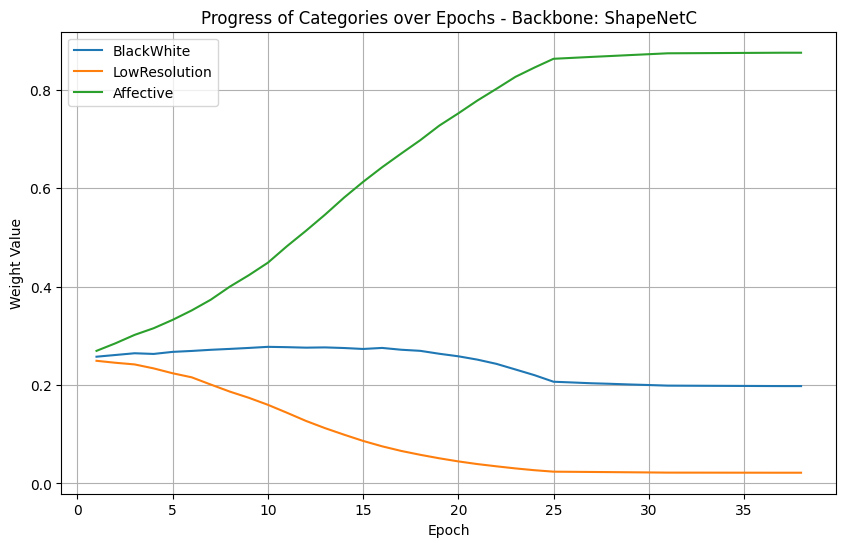

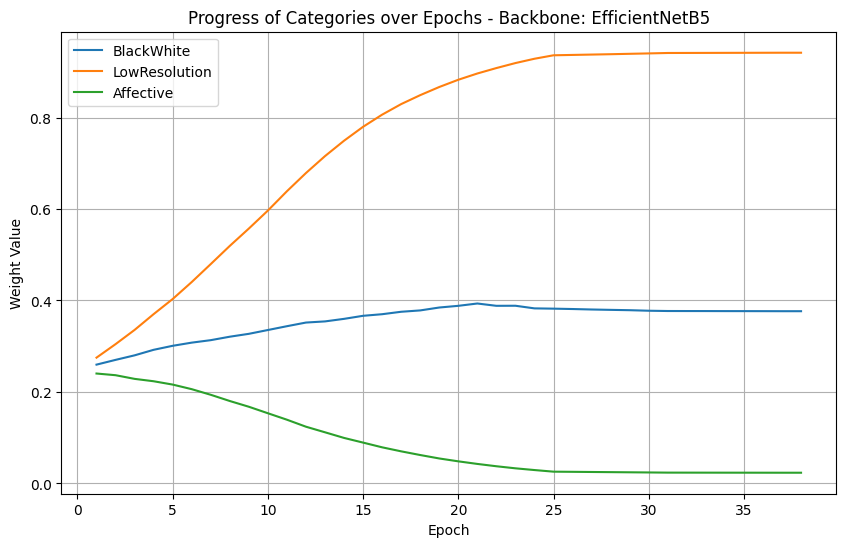

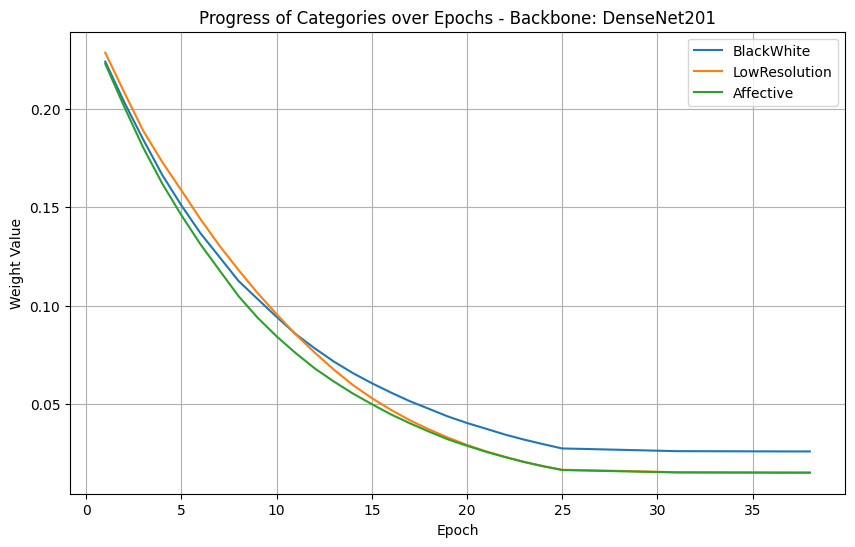

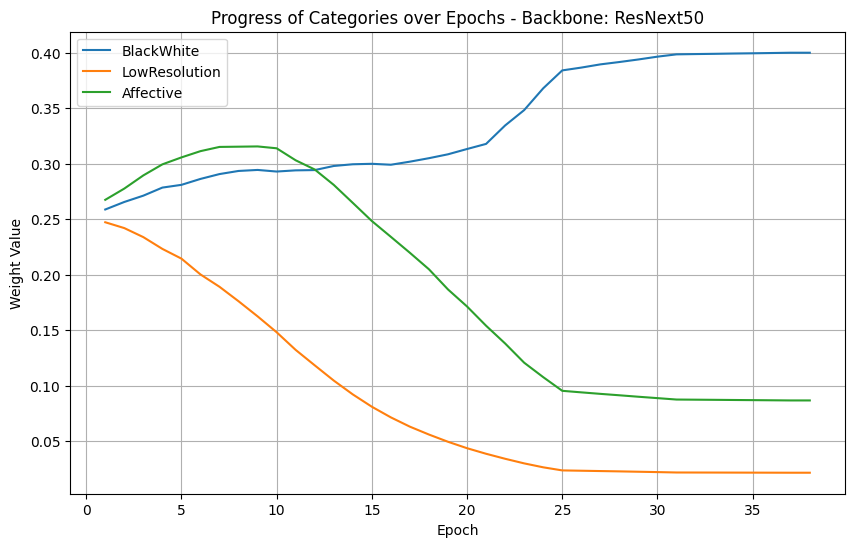

In [16]:
# Filtrar las categorías deseadas y asegurar que cada epoch tiene solo una fila por categoría y backbone
categorias_interes = ["BlackWhite", "LowResolution", "Affective"]
df_filtro = df_total[df_total['Category'].isin(categorias_interes)]

# Nombres de los backbones
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear un plot para cada backbone
for backbone in backbones:
    plt.figure(figsize=(10, 6))
    
    # Graficar cada categoría dentro del backbone seleccionado
    for categoria in categorias_interes:
        # Filtrar solo la categoría y el backbone actual
        df_categoria = df_filtro[(df_filtro['Category'] == categoria)].sort_values(by="Epoch")
        
        # Asegurarse de seleccionar únicamente la columna correspondiente al backbone actual
        plt.plot(df_categoria['Epoch'], df_categoria[backbone], label=categoria)
    
    # Personalizar el gráfico
    plt.xlabel("Epoch")
    plt.ylabel("Weight Value")
    plt.title(f"Progress of Categories over Epochs - Backbone: {backbones[backbone]}")
    plt.legend()
    plt.grid(True)
    plt.show()


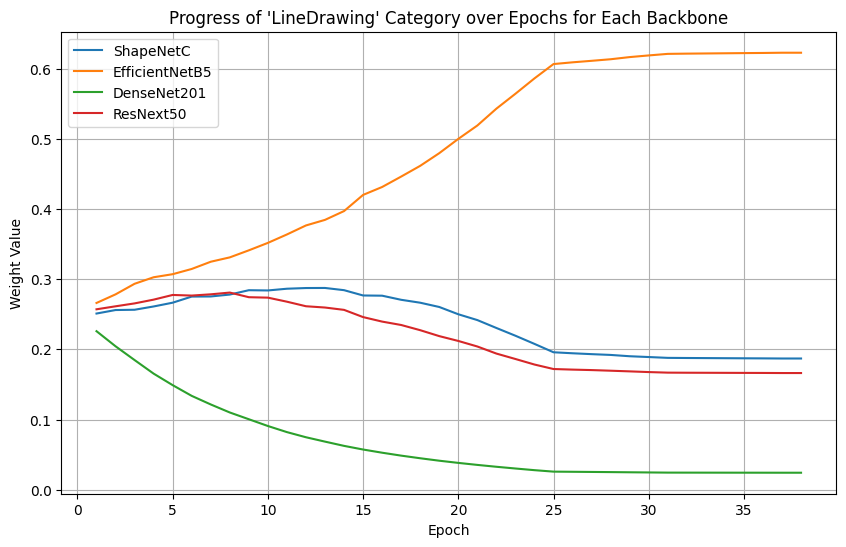

In [18]:
# Filtrar solo la categoría "LineDrawing"
categoria_seleccionada = "LineDrawing"
df_categoria = df_total[df_total['Category'] == categoria_seleccionada].sort_values(by="Epoch")

# Nombres de los backbones para la leyenda y asignación de colores
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear el plot
plt.figure(figsize=(10, 6))

# Graficar el progreso de la categoría seleccionada para cada backbone
for backbone, nombre in backbones.items():
    plt.plot(df_categoria['Epoch'].unique(), df_categoria[df_categoria['Epoch'].duplicated() == False][backbone], label=nombre)

# Personalizar el gráfico
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title(f"Progress of '{categoria_seleccionada}' Category over Epochs for Each Backbone")
plt.legend()
plt.grid(True)
plt.show()


# Segundo run completo para ver si los resultados son consistentes

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a la carpeta principal
carpeta_principal = r"C:\Users\Adrian\Desktop\deepgaze_pytorch\deepgaze_pytorch\checkpoints"

# Lista de categorías en el mismo orden que en la imagen proporcionada
categorias = [
    "Action", "Affective", "Art", "BlackWhite", "Cartoon", "Fractal", "Indoor", "Inverted",
    "Jumbled", "LineDrawing", "LowResolution", "Noisy", "Object", "OutdoorManMade",
    "OutdoorNatural", "Pattern", "Random", "Satellite", "Sketch", "Social"
]

# Ordenar los archivos .npy en la carpeta principal
archivos = sorted([f for f in os.listdir(carpeta_principal) if f.endswith(".npy")])

# Inicializar una lista para almacenar los DataFrames de cada archivo
dataframes = []

# Máximo valor de epoch inicializado en -1
max_epoch = -1

# Recorrer cada archivo y asignar categorías manualmente
for archivo in archivos:
    ruta_archivo = os.path.join(carpeta_principal, archivo)
    
    # Cargar el archivo .npy
    try:
        data = np.load(ruta_archivo)
        
        # Convertir a DataFrame, cada fila es una categoría y cada columna un encoder
        df = pd.DataFrame(data)
        
        # Asignar nombres de categorías en el orden indicado
        df['Category'] = categorias
        
        # Asignar la época
        if archivo == "final_category_weights.npy":
            df['Epoch'] = max_epoch + 1  # Asignar un valor de época mayor que el último
        else:
            epoch = archivo.split('_')[-1].replace(".npy", "")
            epoch_num = int(epoch) if epoch.isdigit() else 0
            df['Epoch'] = epoch_num
            max_epoch = max(max_epoch, epoch_num)  # Actualizar el máximo valor de epoch
        
        # Agregar al DataFrame principal
        dataframes.append(df)
        
        print(f"Archivo {archivo} cargado con éxito.")
    except Exception as e:
        print(f"Error al cargar {ruta_archivo}: {e}")

# Concatenar todos los DataFrames en uno solo
if dataframes:
    df_total = pd.concat(dataframes, ignore_index=True)
    print("DataFrame concatenado con éxito.")
    display(df_total)
else:
    print("No se cargaron datos.")


Archivo category_weights_epoch_1.npy cargado con éxito.
Archivo category_weights_epoch_10.npy cargado con éxito.
Archivo category_weights_epoch_11.npy cargado con éxito.
Archivo category_weights_epoch_12.npy cargado con éxito.
Archivo category_weights_epoch_13.npy cargado con éxito.
Archivo category_weights_epoch_14.npy cargado con éxito.
Archivo category_weights_epoch_15.npy cargado con éxito.
Archivo category_weights_epoch_16.npy cargado con éxito.
Archivo category_weights_epoch_17.npy cargado con éxito.
Archivo category_weights_epoch_18.npy cargado con éxito.
Archivo category_weights_epoch_19.npy cargado con éxito.
Archivo category_weights_epoch_2.npy cargado con éxito.
Archivo category_weights_epoch_20.npy cargado con éxito.
Archivo category_weights_epoch_21.npy cargado con éxito.
Archivo category_weights_epoch_22.npy cargado con éxito.
Archivo category_weights_epoch_23.npy cargado con éxito.
Archivo category_weights_epoch_24.npy cargado con éxito.
Archivo category_weights_epoch_25

,0,1,2,3,Category,Epoch
0,0.271318,0.246315,0.224773,0.257593,Action,1
1,0.270254,0.245567,0.226033,0.258146,Affective,1
2,0.262085,0.262600,0.226871,0.248444,Art,1
3,0.258104,0.265639,0.223801,0.252456,BlackWhite,1
4,0.264709,0.246338,0.226938,0.262015,Cartoon,1
...,...,...,...,...,...,...
595,0.118144,0.650386,0.042054,0.189417,Pattern,30
596,0.332785,0.492682,0.043378,0.131154,Random,30
597,0.070424,0.756304,0.055888,0.117384,Satellite,30
598,0.488869,0.172283,0.034851,0.303997,Sketch,30


In [2]:
# Ruta para la carpeta de Descargas
ruta_descargas = r"C:\Users\Adrian\Downloads\progreso_pesos_2.csv"

# Exportar el DataFrame a CSV
df_total.to_csv(ruta_descargas, index=False)
print(f"Archivo CSV exportado exitosamente a {ruta_descargas}")



Archivo CSV exportado exitosamente a C:\Users\Adrian\Downloads\progreso_pesos_2.csv


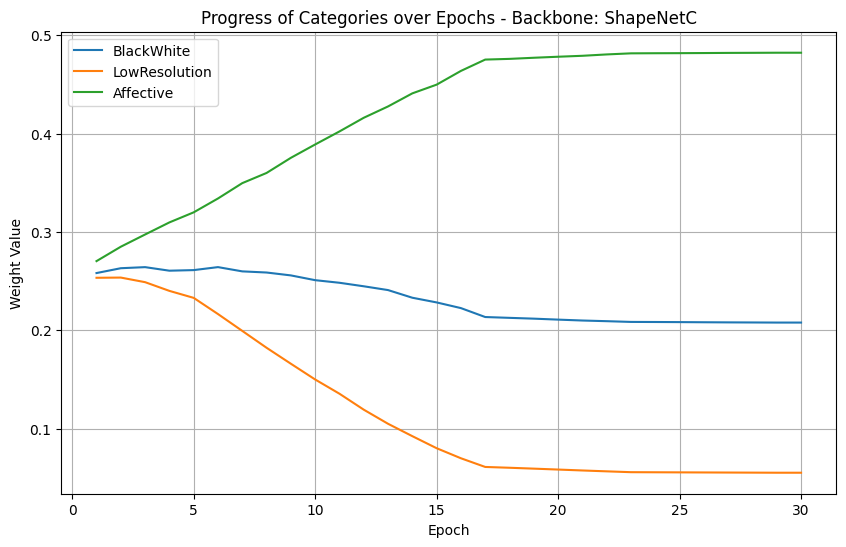

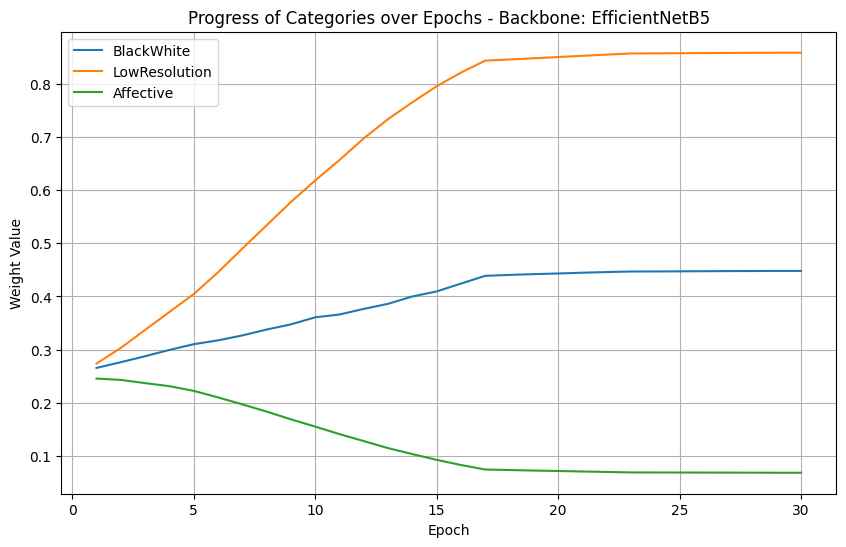

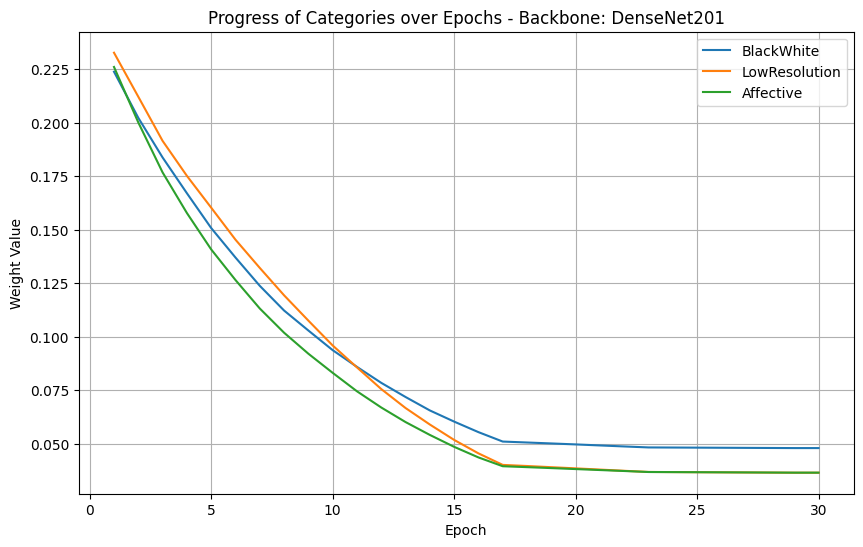

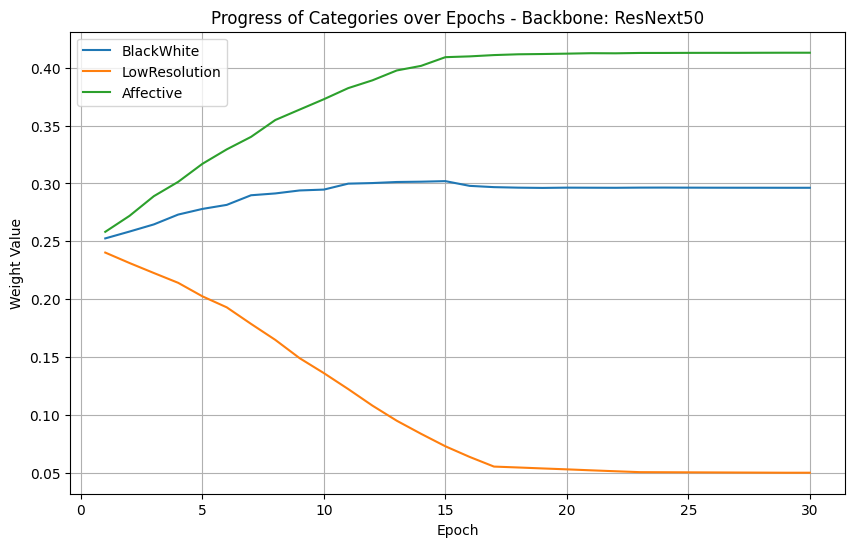

In [3]:
# Filtrar las categorías deseadas y asegurar que cada epoch tiene solo una fila por categoría y backbone
categorias_interes = ["BlackWhite", "LowResolution", "Affective"]
df_filtro = df_total[df_total['Category'].isin(categorias_interes)]

# Nombres de los backbones
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear un plot para cada backbone
for backbone in backbones:
    plt.figure(figsize=(10, 6))
    
    # Graficar cada categoría dentro del backbone seleccionado
    for categoria in categorias_interes:
        # Filtrar solo la categoría y el backbone actual
        df_categoria = df_filtro[(df_filtro['Category'] == categoria)].sort_values(by="Epoch")
        
        # Asegurarse de seleccionar únicamente la columna correspondiente al backbone actual
        plt.plot(df_categoria['Epoch'], df_categoria[backbone], label=categoria)
    
    # Personalizar el gráfico
    plt.xlabel("Epoch")
    plt.ylabel("Weight Value")
    plt.title(f"Progress of Categories over Epochs - Backbone: {backbones[backbone]}")
    plt.legend()
    plt.grid(True)
    plt.show()


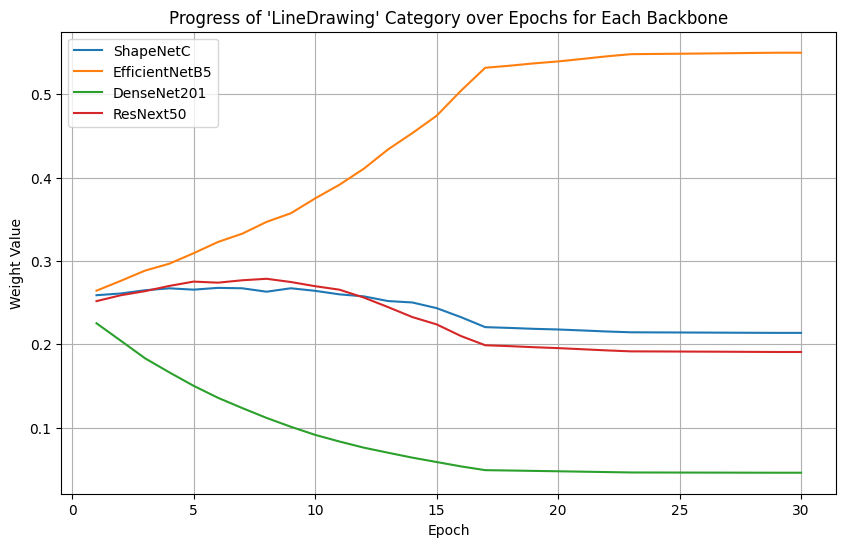

In [4]:
# Filtrar solo la categoría "LineDrawing"
categoria_seleccionada = "LineDrawing"
df_categoria = df_total[df_total['Category'] == categoria_seleccionada].sort_values(by="Epoch")

# Nombres de los backbones para la leyenda y asignación de colores
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear el plot
plt.figure(figsize=(10, 6))

# Graficar el progreso de la categoría seleccionada para cada backbone
for backbone, nombre in backbones.items():
    plt.plot(df_categoria['Epoch'].unique(), df_categoria[df_categoria['Epoch'].duplicated() == False][backbone], label=nombre)

# Personalizar el gráfico
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title(f"Progress of '{categoria_seleccionada}' Category over Epochs for Each Backbone")
plt.legend()
plt.grid(True)
plt.show()


# Tercer run completo con el modelo final para ver si los resultados siguen siendo consistentes

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a la carpeta principal
carpeta_principal = r"C:\Users\Adrian\Desktop\deepgaze_pytorch\deepgaze_pytorch\checkpoints"

# Lista de categorías en el mismo orden que en la imagen proporcionada
categorias = [
    "Action", "Affective", "Art", "BlackWhite", "Cartoon", "Fractal", "Indoor", "Inverted",
    "Jumbled", "LineDrawing", "LowResolution", "Noisy", "Object", "OutdoorManMade",
    "OutdoorNatural", "Pattern", "Random", "Satellite", "Sketch", "Social"
]

# Ordenar los archivos .npy en la carpeta principal
archivos = sorted([f for f in os.listdir(carpeta_principal) if f.endswith(".npy")])

# Inicializar una lista para almacenar los DataFrames de cada archivo
dataframes = []

# Máximo valor de epoch inicializado en -1
max_epoch = -1

# Recorrer cada archivo y asignar categorías manualmente
for archivo in archivos:
    ruta_archivo = os.path.join(carpeta_principal, archivo)
    
    # Cargar el archivo .npy
    try:
        data = np.load(ruta_archivo)
        
        # Convertir a DataFrame, cada fila es una categoría y cada columna un encoder
        df = pd.DataFrame(data)
        
        # Asignar nombres de categorías en el orden indicado
        df['Category'] = categorias
        
        # Asignar la época
        if archivo == "final_category_weights.npy":
            df['Epoch'] = max_epoch + 1  # Asignar un valor de época mayor que el último
        else:
            epoch = archivo.split('_')[-1].replace(".npy", "")
            epoch_num = int(epoch) if epoch.isdigit() else 0
            df['Epoch'] = epoch_num
            max_epoch = max(max_epoch, epoch_num)  # Actualizar el máximo valor de epoch
        
        # Agregar al DataFrame principal
        dataframes.append(df)
        
        print(f"Archivo {archivo} cargado con éxito.")
    except Exception as e:
        print(f"Error al cargar {ruta_archivo}: {e}")

# Concatenar todos los DataFrames en uno solo
if dataframes:
    df_total = pd.concat(dataframes, ignore_index=True)
    print("DataFrame concatenado con éxito.")
    display(df_total)
else:
    print("No se cargaron datos.")


Archivo category_weights_epoch_1.npy cargado con éxito.
Archivo category_weights_epoch_10.npy cargado con éxito.
Archivo category_weights_epoch_11.npy cargado con éxito.
Archivo category_weights_epoch_12.npy cargado con éxito.
Archivo category_weights_epoch_13.npy cargado con éxito.
Archivo category_weights_epoch_14.npy cargado con éxito.
Archivo category_weights_epoch_15.npy cargado con éxito.
Archivo category_weights_epoch_16.npy cargado con éxito.
Archivo category_weights_epoch_17.npy cargado con éxito.
Archivo category_weights_epoch_18.npy cargado con éxito.
Archivo category_weights_epoch_19.npy cargado con éxito.
Archivo category_weights_epoch_2.npy cargado con éxito.
Archivo category_weights_epoch_20.npy cargado con éxito.
Archivo category_weights_epoch_21.npy cargado con éxito.
Archivo category_weights_epoch_22.npy cargado con éxito.
Archivo category_weights_epoch_23.npy cargado con éxito.
Archivo category_weights_epoch_24.npy cargado con éxito.
Archivo category_weights_epoch_25

,0,1,2,3,Category,Epoch
0,0.263778,0.242239,0.225561,0.268422,Action,1
1,0.264629,0.242273,0.226773,0.266324,Affective,1
2,0.257771,0.255443,0.232097,0.254690,Art,1
3,0.261312,0.253247,0.227092,0.258350,BlackWhite,1
4,0.260044,0.248227,0.231664,0.260066,Cartoon,1
...,...,...,...,...,...,...
975,0.017089,0.934132,0.010346,0.038434,Pattern,49
976,0.246488,0.708277,0.012705,0.032530,Random,49
977,0.016996,0.931217,0.012189,0.039598,Satellite,49
978,0.244305,0.217018,0.012875,0.525802,Sketch,49


In [2]:
# Ruta para la carpeta de Descargas
ruta_descargas = r"C:\Users\Adrian\Downloads\progreso_pesos_final.csv"

# Exportar el DataFrame a CSV
df_total.to_csv(ruta_descargas, index=False)
print(f"Archivo CSV exportado exitosamente a {ruta_descargas}")



Archivo CSV exportado exitosamente a C:\Users\Adrian\Downloads\progreso_pesos_final.csv


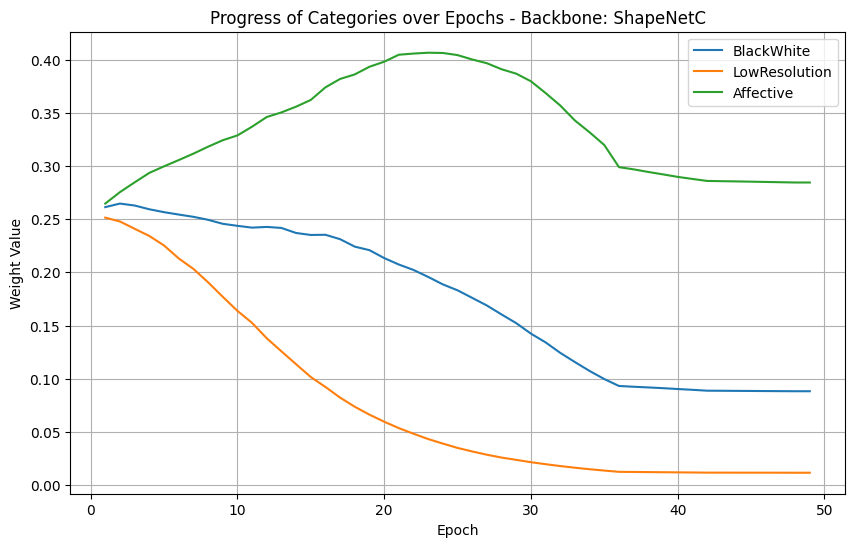

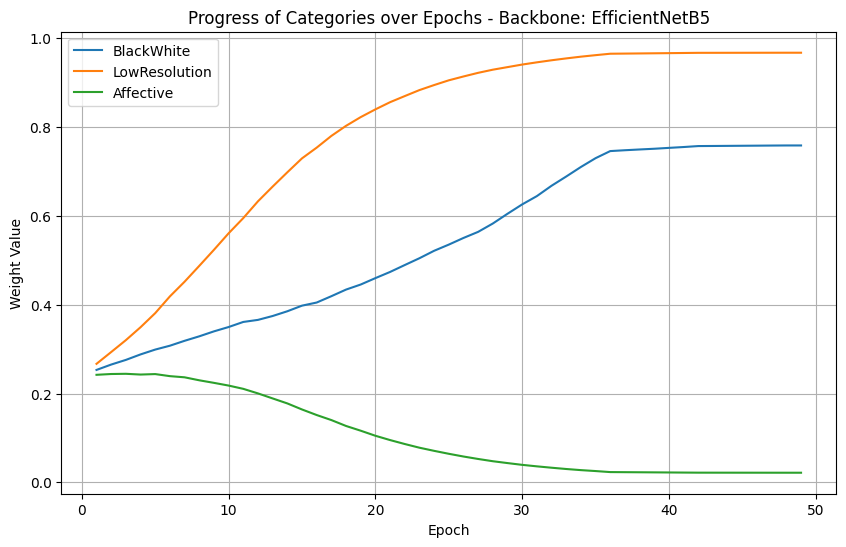

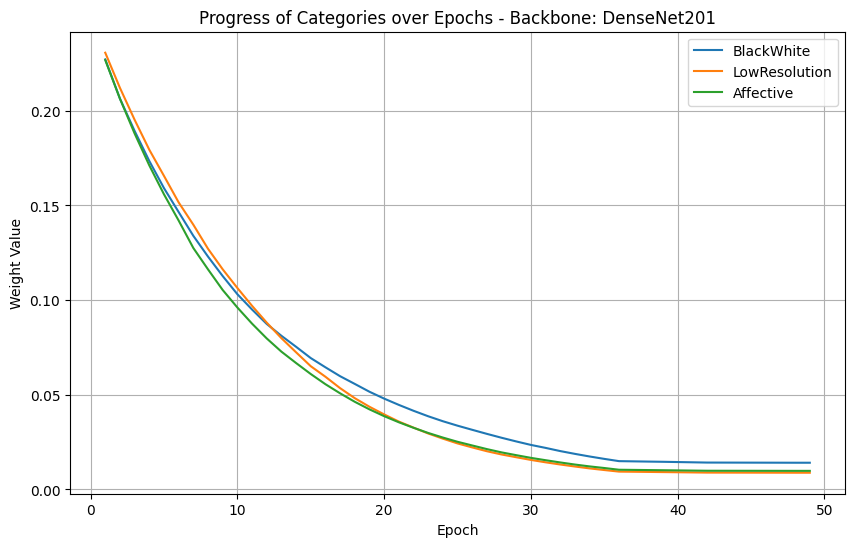

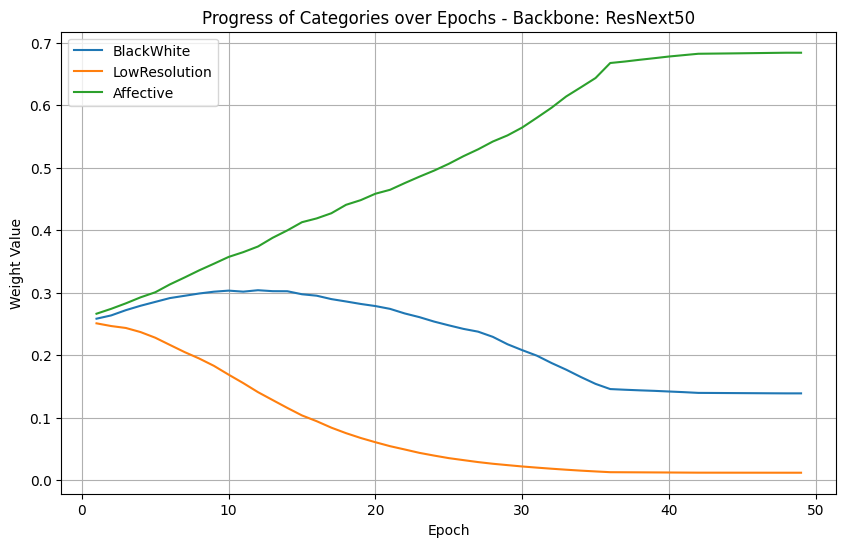

In [3]:
# Filtrar las categorías deseadas y asegurar que cada epoch tiene solo una fila por categoría y backbone
categorias_interes = ["BlackWhite", "LowResolution", "Affective"]
df_filtro = df_total[df_total['Category'].isin(categorias_interes)]

# Nombres de los backbones
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear un plot para cada backbone
for backbone in backbones:
    plt.figure(figsize=(10, 6))
    
    # Graficar cada categoría dentro del backbone seleccionado
    for categoria in categorias_interes:
        # Filtrar solo la categoría y el backbone actual
        df_categoria = df_filtro[(df_filtro['Category'] == categoria)].sort_values(by="Epoch")
        
        # Asegurarse de seleccionar únicamente la columna correspondiente al backbone actual
        plt.plot(df_categoria['Epoch'], df_categoria[backbone], label=categoria)
    
    # Personalizar el gráfico
    plt.xlabel("Epoch")
    plt.ylabel("Weight Value")
    plt.title(f"Progress of Categories over Epochs - Backbone: {backbones[backbone]}")
    plt.legend()
    plt.grid(True)
    plt.show()


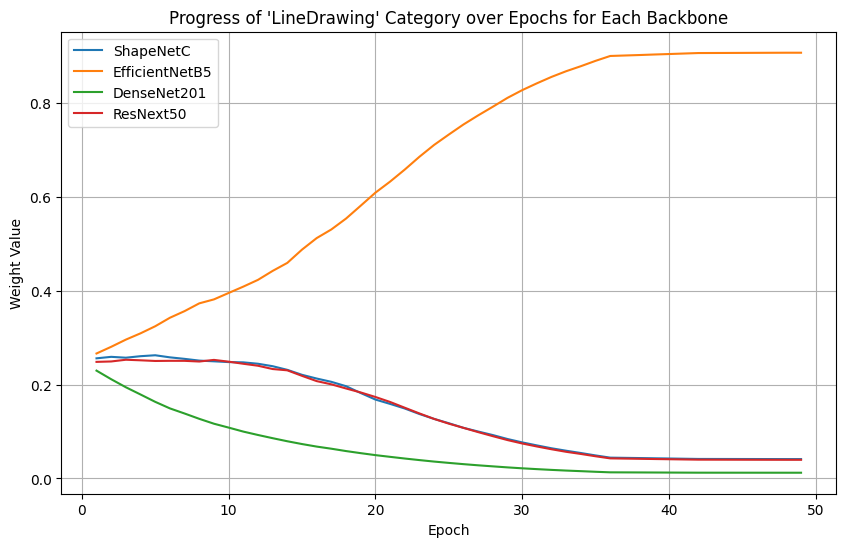

In [4]:
# Filtrar solo la categoría "LineDrawing"
categoria_seleccionada = "LineDrawing"
df_categoria = df_total[df_total['Category'] == categoria_seleccionada].sort_values(by="Epoch")

# Nombres de los backbones para la leyenda y asignación de colores
backbones = {0: "ShapeNetC", 1: "EfficientNetB5", 2: "DenseNet201", 3: "ResNext50"}

# Crear el plot
plt.figure(figsize=(10, 6))

# Graficar el progreso de la categoría seleccionada para cada backbone
for backbone, nombre in backbones.items():
    plt.plot(df_categoria['Epoch'].unique(), df_categoria[df_categoria['Epoch'].duplicated() == False][backbone], label=nombre)

# Personalizar el gráfico
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title(f"Progress of '{categoria_seleccionada}' Category over Epochs for Each Backbone")
plt.legend()
plt.grid(True)
plt.show()
